<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Jose_Miguel-Guerrero_Arias/blob/main/Actividad_Semanal_5_Repaso_Transformaci%C3%B3n_y_reducci%C3%B3n_de_dimensiones_A01793075.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Prof María de la Paz Rico Fernández
###27 de octubre de 2022

## **Actividad Semanal -- 5**
###**Repaso Transformación y reducción de dimensiones**

**Nombre:** José Miguel Guerrero Arias

**Matricula:** A01793075
<br><br>

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B1= np.dot(W,D)
B = np.dot(B1,Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [2]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [3]:
#Matriz 1
W = vectors
print(W)

[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [4]:
#Matriz 2
Winv = np.linalg.inv(W)
print(Winv)

[[-0.95827338-1.73001905e-17j -0.1739303 +3.46003810e-17j
  -0.61649796-0.00000000e+00j]
 [-0.30900456-3.92091481e-01j  0.52417711+1.74262881e-01j
  -0.19879576+9.96744696e-01j]
 [-0.30900456+3.92091481e-01j  0.52417711-1.74262881e-01j
  -0.19879576-9.96744696e-01j]]


In [5]:
#Matriz 3
D = np.diag(values)
print(D)

[[3.54451153+0.j         0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.22774424+1.82582815j 0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.22774424-1.82582815j]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


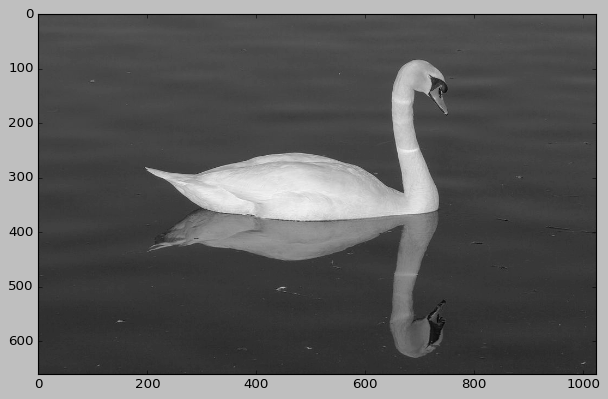

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F1D3F0D1310>


In [6]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [7]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [8]:
U.shape

(660, 660)

In [9]:
V.shape

(1024, 1024)

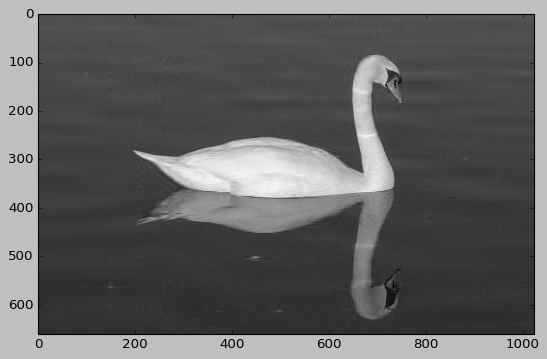

Felicidades la imagen está comprimida


In [10]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[ 49.  49.  49. ... 162. 160. 159.]


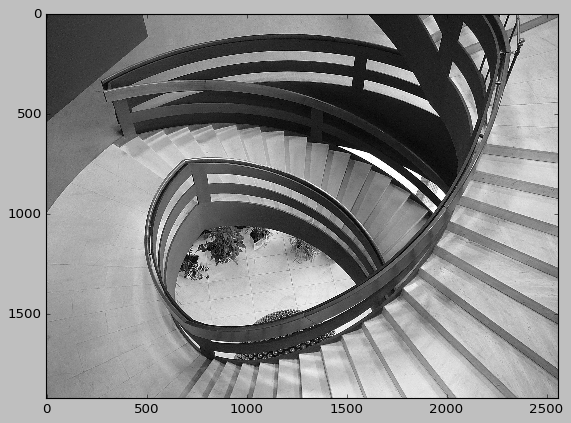

<PIL.Image.Image image mode=LA size=2560x1920 at 0x7F1D3AC73290>


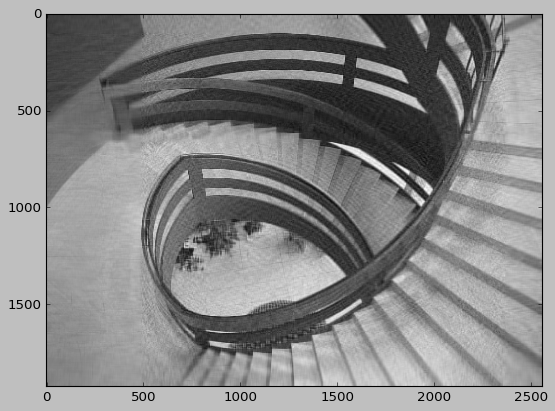

Compresion a un valor de 75


In [11]:
#imagen 1
img1 = Image.open('prague-conference-center-1056491.jpg').convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

U,D,V = np.linalg.svd(imgmat1)
nvalue1 = 75
reconstimg1 = np.matrix(U[:,:nvalue1])*np.diag(D[:nvalue1])*np.matrix(V[:nvalue1,:])
plt.imshow(reconstimg1,cmap='gray')
plt.show()
print(f"Compresion a un valor de {nvalue1}")

[62. 63. 63. ... 25. 26. 28.]


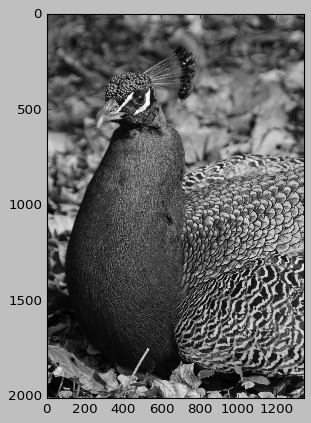

<PIL.Image.Image image mode=LA size=1344x2008 at 0x7F1D3AC3B3D0>


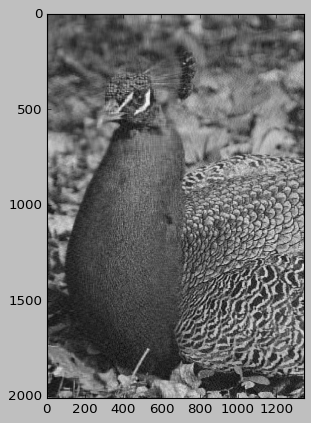

Compresion a un valor de 90


In [12]:
#imagen 2
img2 = Image.open('peacock-1169961.jpg').convert('LA')
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)

U,D,V = np.linalg.svd(imgmat2)
nvalue2 = 90
reconstimg2 = np.matrix(U[:,:nvalue2])*np.diag(D[:nvalue2])*np.matrix(V[:nvalue2,:])
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print(f"Compresion a un valor de {nvalue2}")

[40. 43. 46. ... 82. 83. 80.]


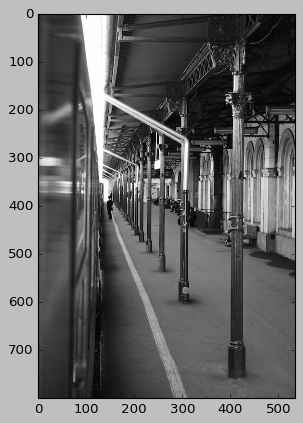

<PIL.Image.Image image mode=LA size=536x800 at 0x7F1D3ABA54D0>


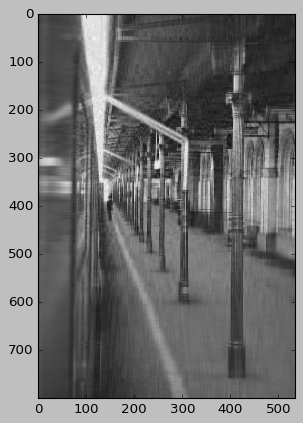

Compresion a un valor de 35


In [13]:
#imagen 3
img3 = Image.open('platform-1154314.jpg').convert('LA')
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3)

U,D,V = np.linalg.svd(imgmat3)
nvalue3 = 35
reconstimg3 = np.matrix(U[:,:nvalue3])*np.diag(D[:nvalue3])*np.matrix(V[:nvalue3,:])
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print(f"Compresion a un valor de {nvalue3}")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Se carga la informacion
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Z-score the features
scaler = StandardScaler() #se selecciona un metodo de escalamiento
scaler.fit(X)
X = scaler.transform(X)

# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space


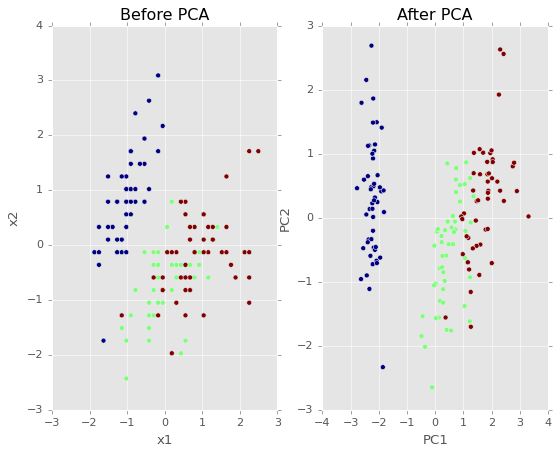

In [15]:
fig, axes = plt.subplots(1,2)

#Se grafican los valores iniciales
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#Se grafican los valores una vez realizado el PCA
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [16]:
print(pca.explained_variance_ratio_) #el componente principal 1 obtiene 72.9% de la varianza de los datos, mientras que el PC2 obtiene el 22.8%

[0.72962445 0.22850762]


In [17]:
np.cov(X_new.T) #se obtiene la covarianza de la matriz reducida las cuales son iguales a los eigenvalores

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [18]:
pca.explained_variance_ #se obtienen los eigenvalores


array([2.93808505, 0.9201649 ])

In [19]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


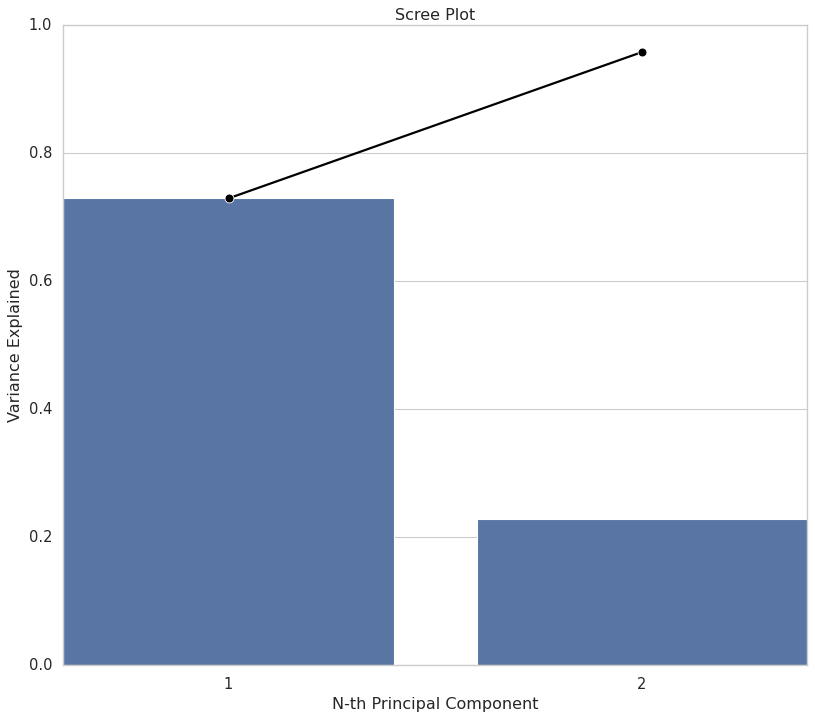

In [20]:
import seaborn as sns
PC_components = np.arange(pca.n_components_) + 1


_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(12, 10))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [21]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

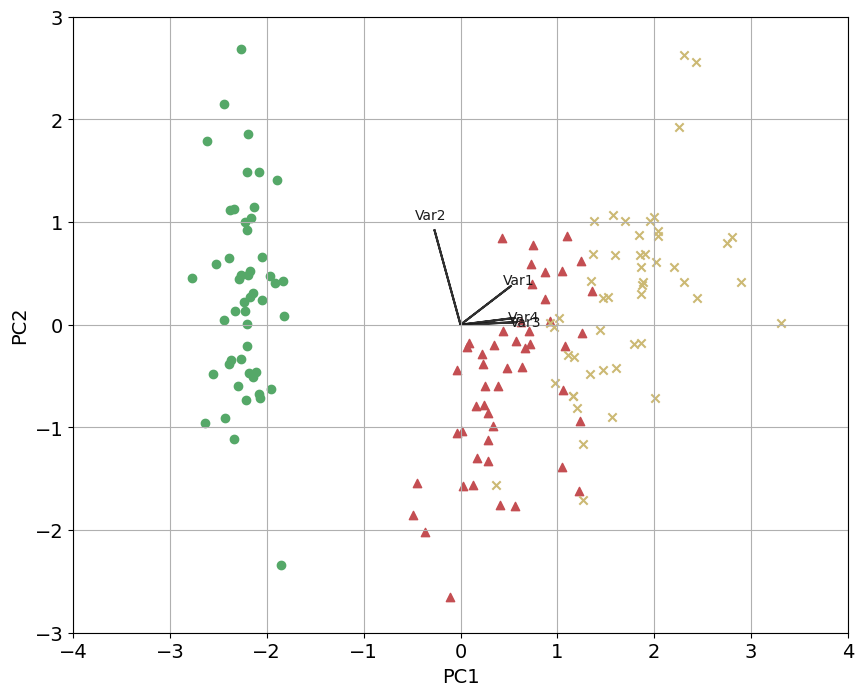

In [22]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [23]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

#Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

##¿Qué es feature importance y para que nos sirve?
*   Es el proceso que permite la reducción de dimensionalidad de un set de datos, lo anterior es útil cuando se tienen miles o millones de datos y se quiere optimizar la base de tal forma que sea más rápido el entrenamiento y despliegue de modelos evitando así costos computacionales altos, asimismo, facilita la visualización de datos cuando existen muchas dimensiones en la base. Este proceso identifica el hiperplano más cercano a nuestra información, proyecta dicha información en dimensiones menores preservando durante este proceso la máxima cantidad de varianza.

##¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
*   Del ejercicio anterior, vemos que el componente principal 1 (PC1) aporta casi 73% de la varianza, mientras que el PC2 aporta alrededor de 23%, lo anterior nos indica que estos dos componentes aportan aproximadamente 96% de la varianza de los datos, reduciendo así a solo dos componentes de 4 componentes. En los cuales los últimos 2 componentes no son relevantes. También se observa que las variables 1, 3 y 4 son las más importantes para el PC1 y la variable 2 y 1 es la más importante para el PC2, lo anterior se concluye de la correlación que existe entre la variable 3 y 4, así como la correlación negativa entre la variable 2 y 3 del componente PC2.

##¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
*   Este procedimiento es útil cuando se requiera optimizar los datos de tal forma que la reducción de dimensiones sea necesaria ya que a medida que aumenta la dimensionalidad aumenta exponencialmente la resolución del problema. 